In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# checking data type
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
#check the rows and column
df.shape

(9994, 13)

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#Analysis Segment of people buying from the supermart.
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
df['Segment'].value_counts()/len(df['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

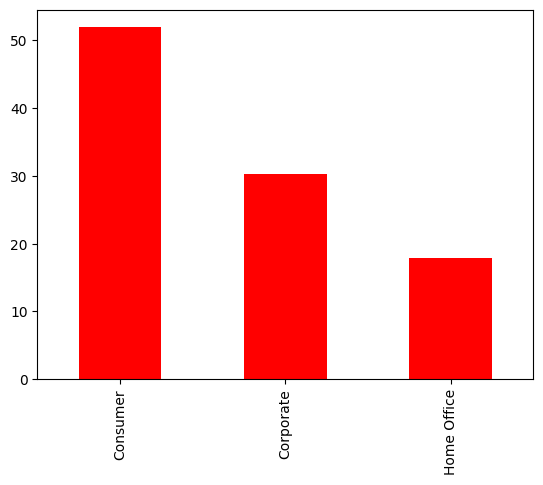

In [12]:
S=(df['Segment'].value_counts()/len(df['Segment'])*100).plot(kind='bar',color='r')

In [13]:
#Anaysing ship mode for the Supermart
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [14]:
M=(df['Ship Mode'].value_counts()/len(df['Ship Mode'])*100)
M

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:>

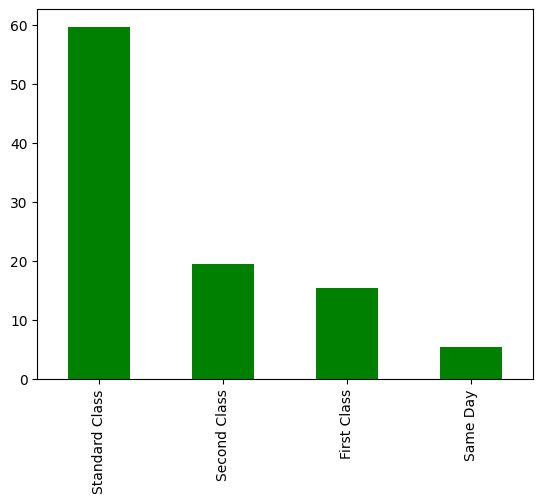

In [15]:
M.plot(kind='bar',color='green')

In [16]:
# Analying catagory of items in the supermart
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:>

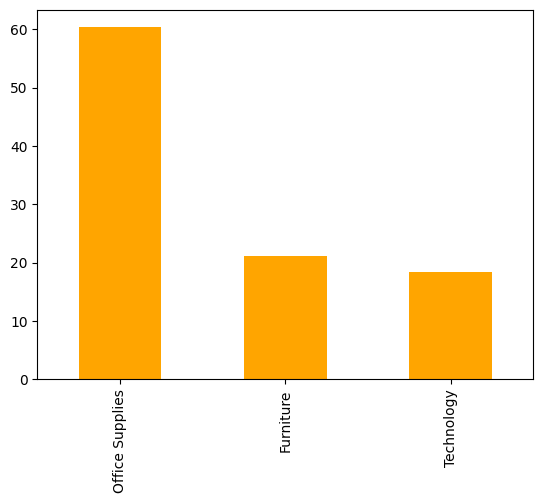

In [18]:
H=(df['Category'].value_counts()/len(df['Category'])*100)
H.plot(kind='bar',color='orange')

C:\Users\HP\opencv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


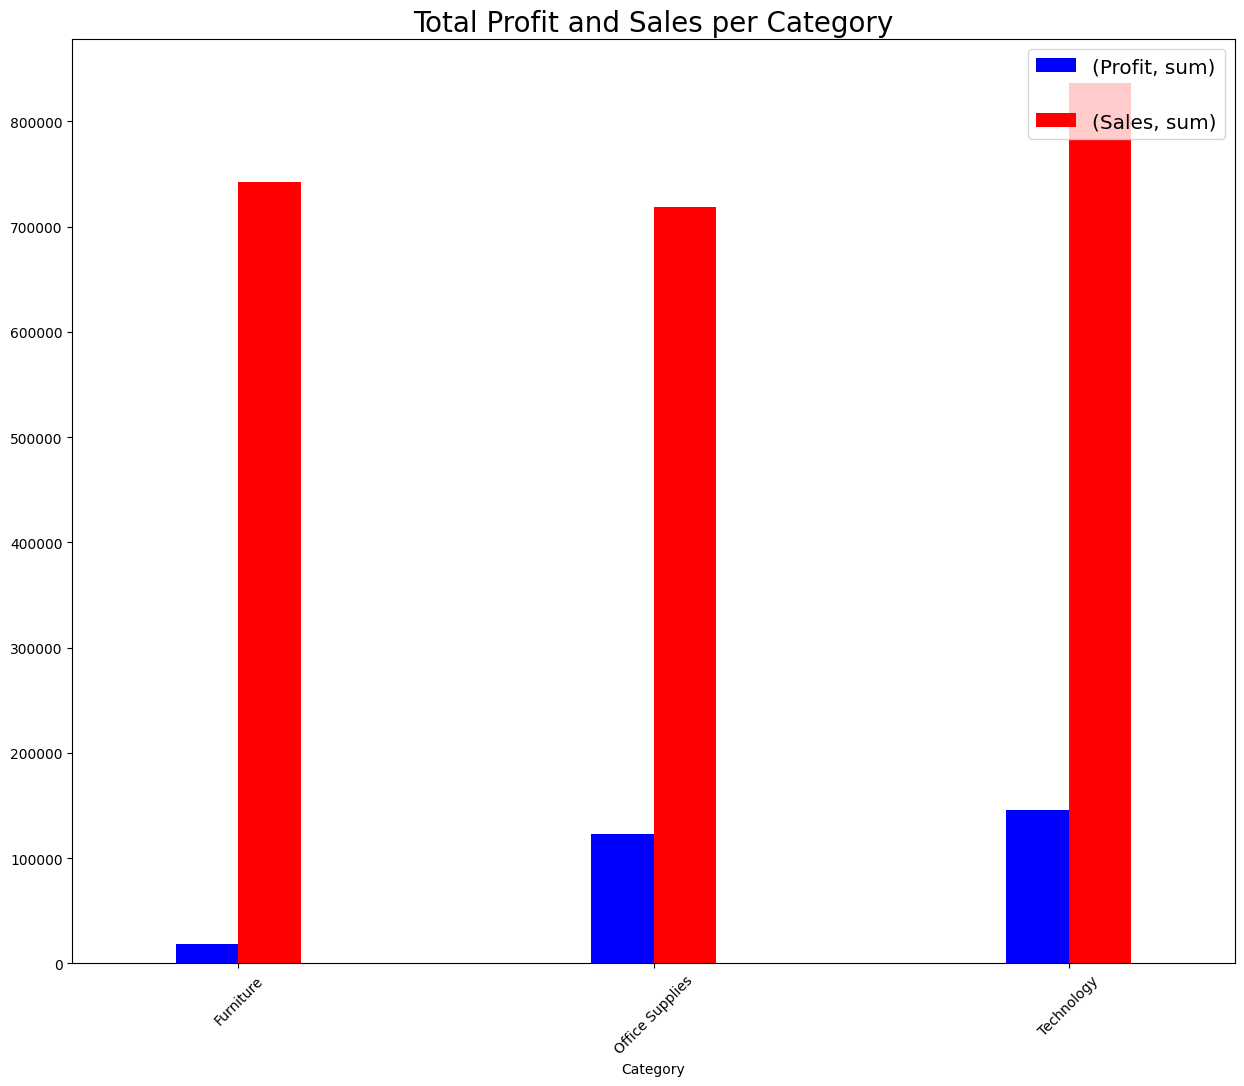

In [19]:
#profit and sales per Category
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(rot=45,figsize=(15,12),color={'blue','red'},width=0.3)
plt.legend(loc=1,fontsize='x-large',labelspacing=1.8)
plt.title('Total Profit and Sales per Category',fontsize=20)
plt.show()

C:\Users\HP\opencv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


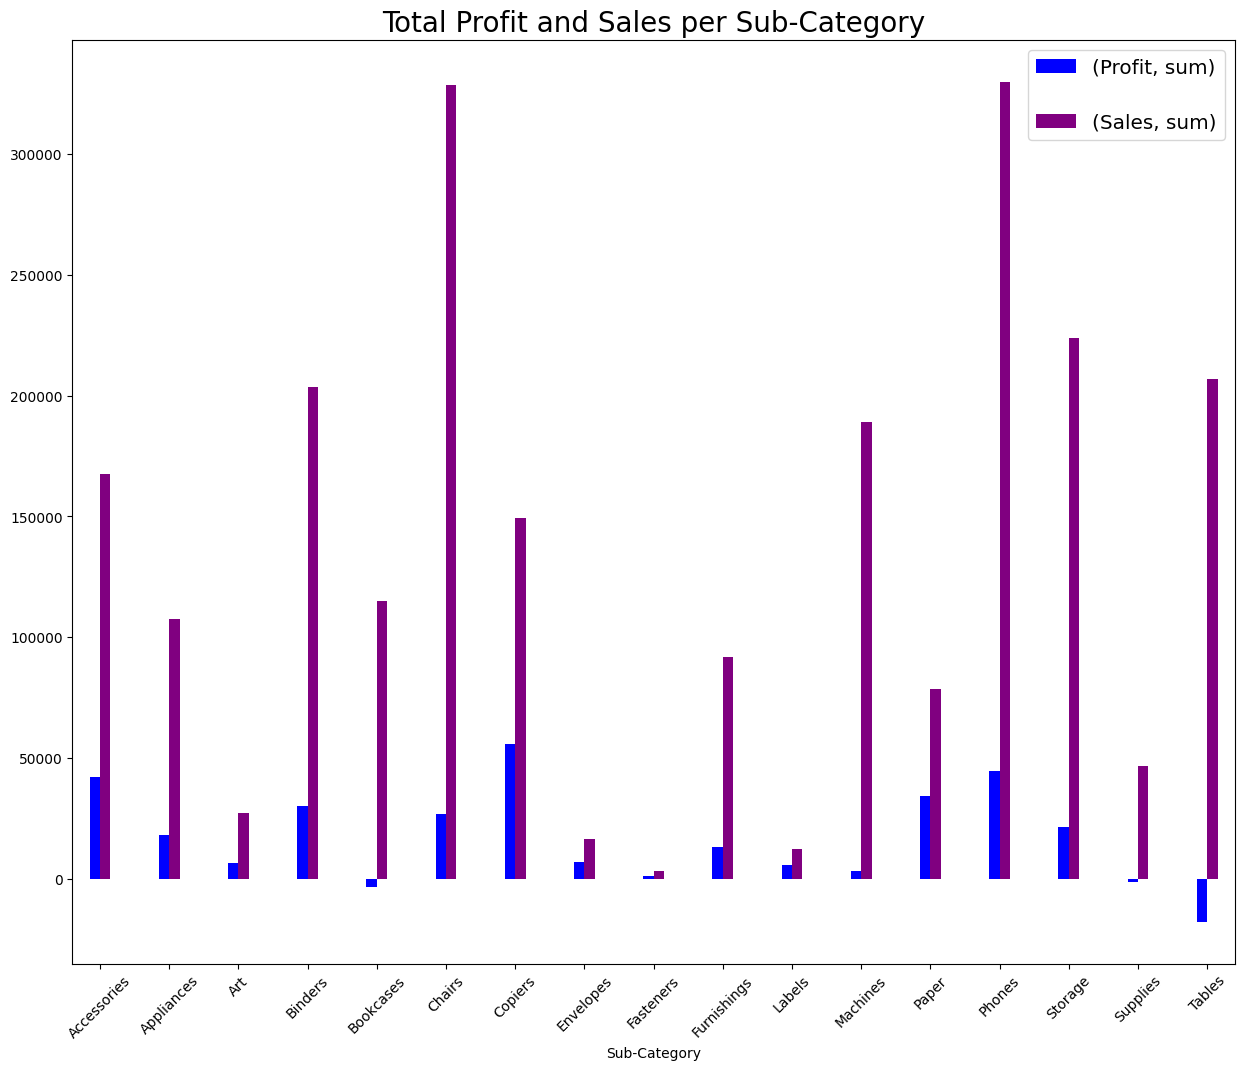

In [20]:
#profit and sales per sub-Category
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(rot=45,figsize=(15,12),color={'blue','purple'},width=0.3)
plt.legend(loc=1,fontsize='x-large',labelspacing=1.8)
plt.title('Total Profit and Sales per Sub-Category',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Region-Wise count of Categorial sales')

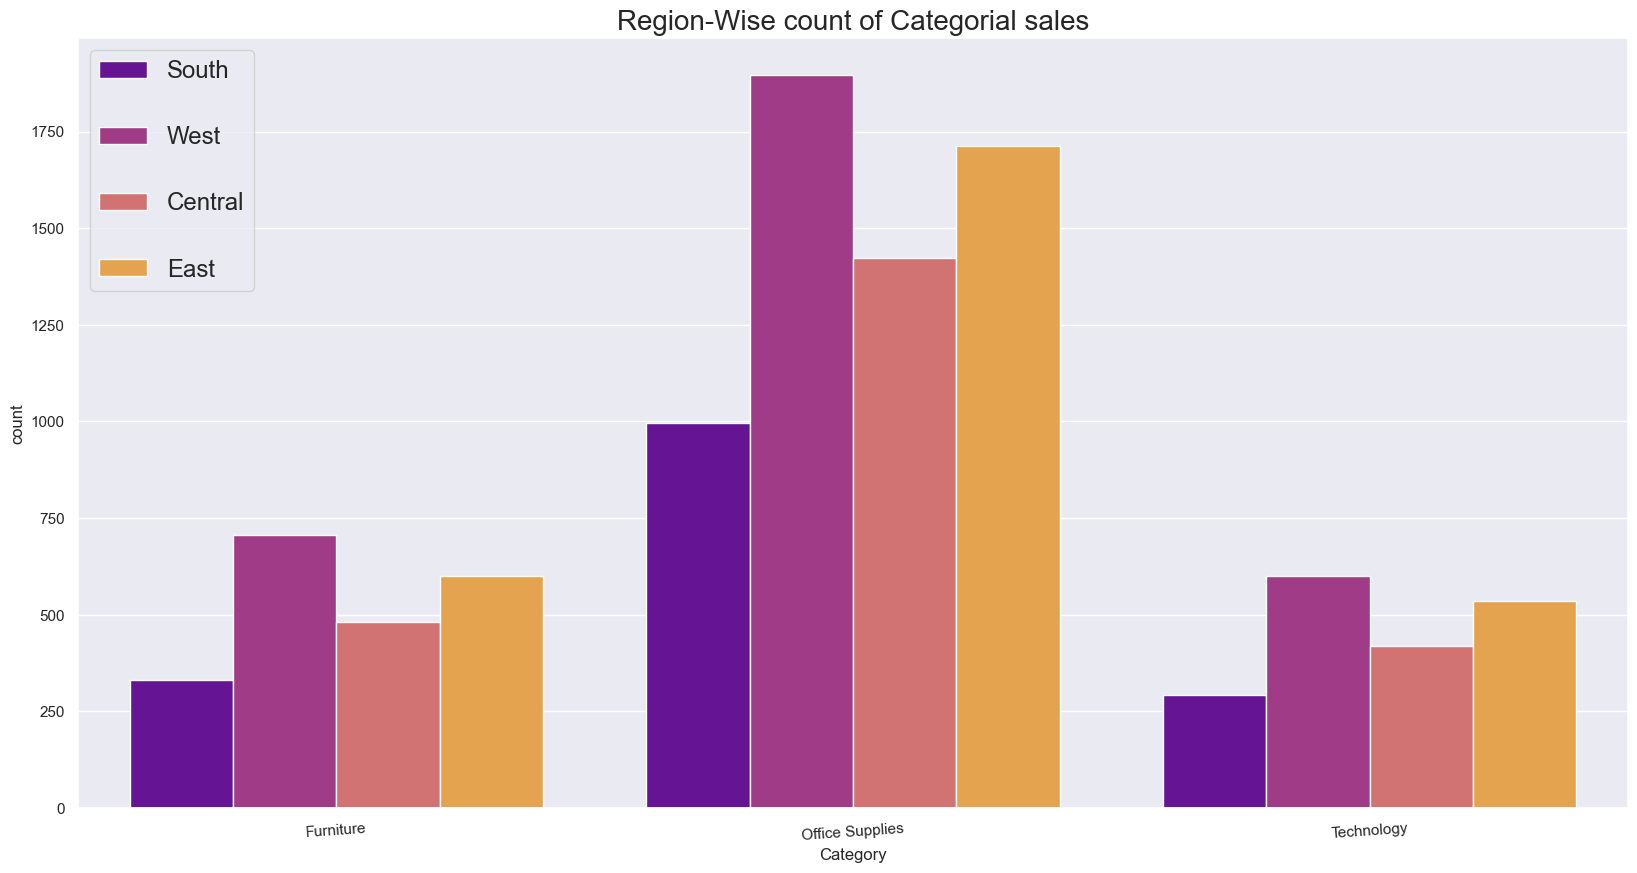

In [21]:
#region-wise count of categorical sales
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x="Category",hue="Region",data=df,palette='plasma')
plt.xticks(rotation=4)
plt.legend(loc=2,fontsize='x-large',labelspacing=1.8)
plt.title('Region-Wise count of Categorial sales',fontsize=20)

Text(0.5, 1.0, 'Region-Wise count of SubCategorial sales')

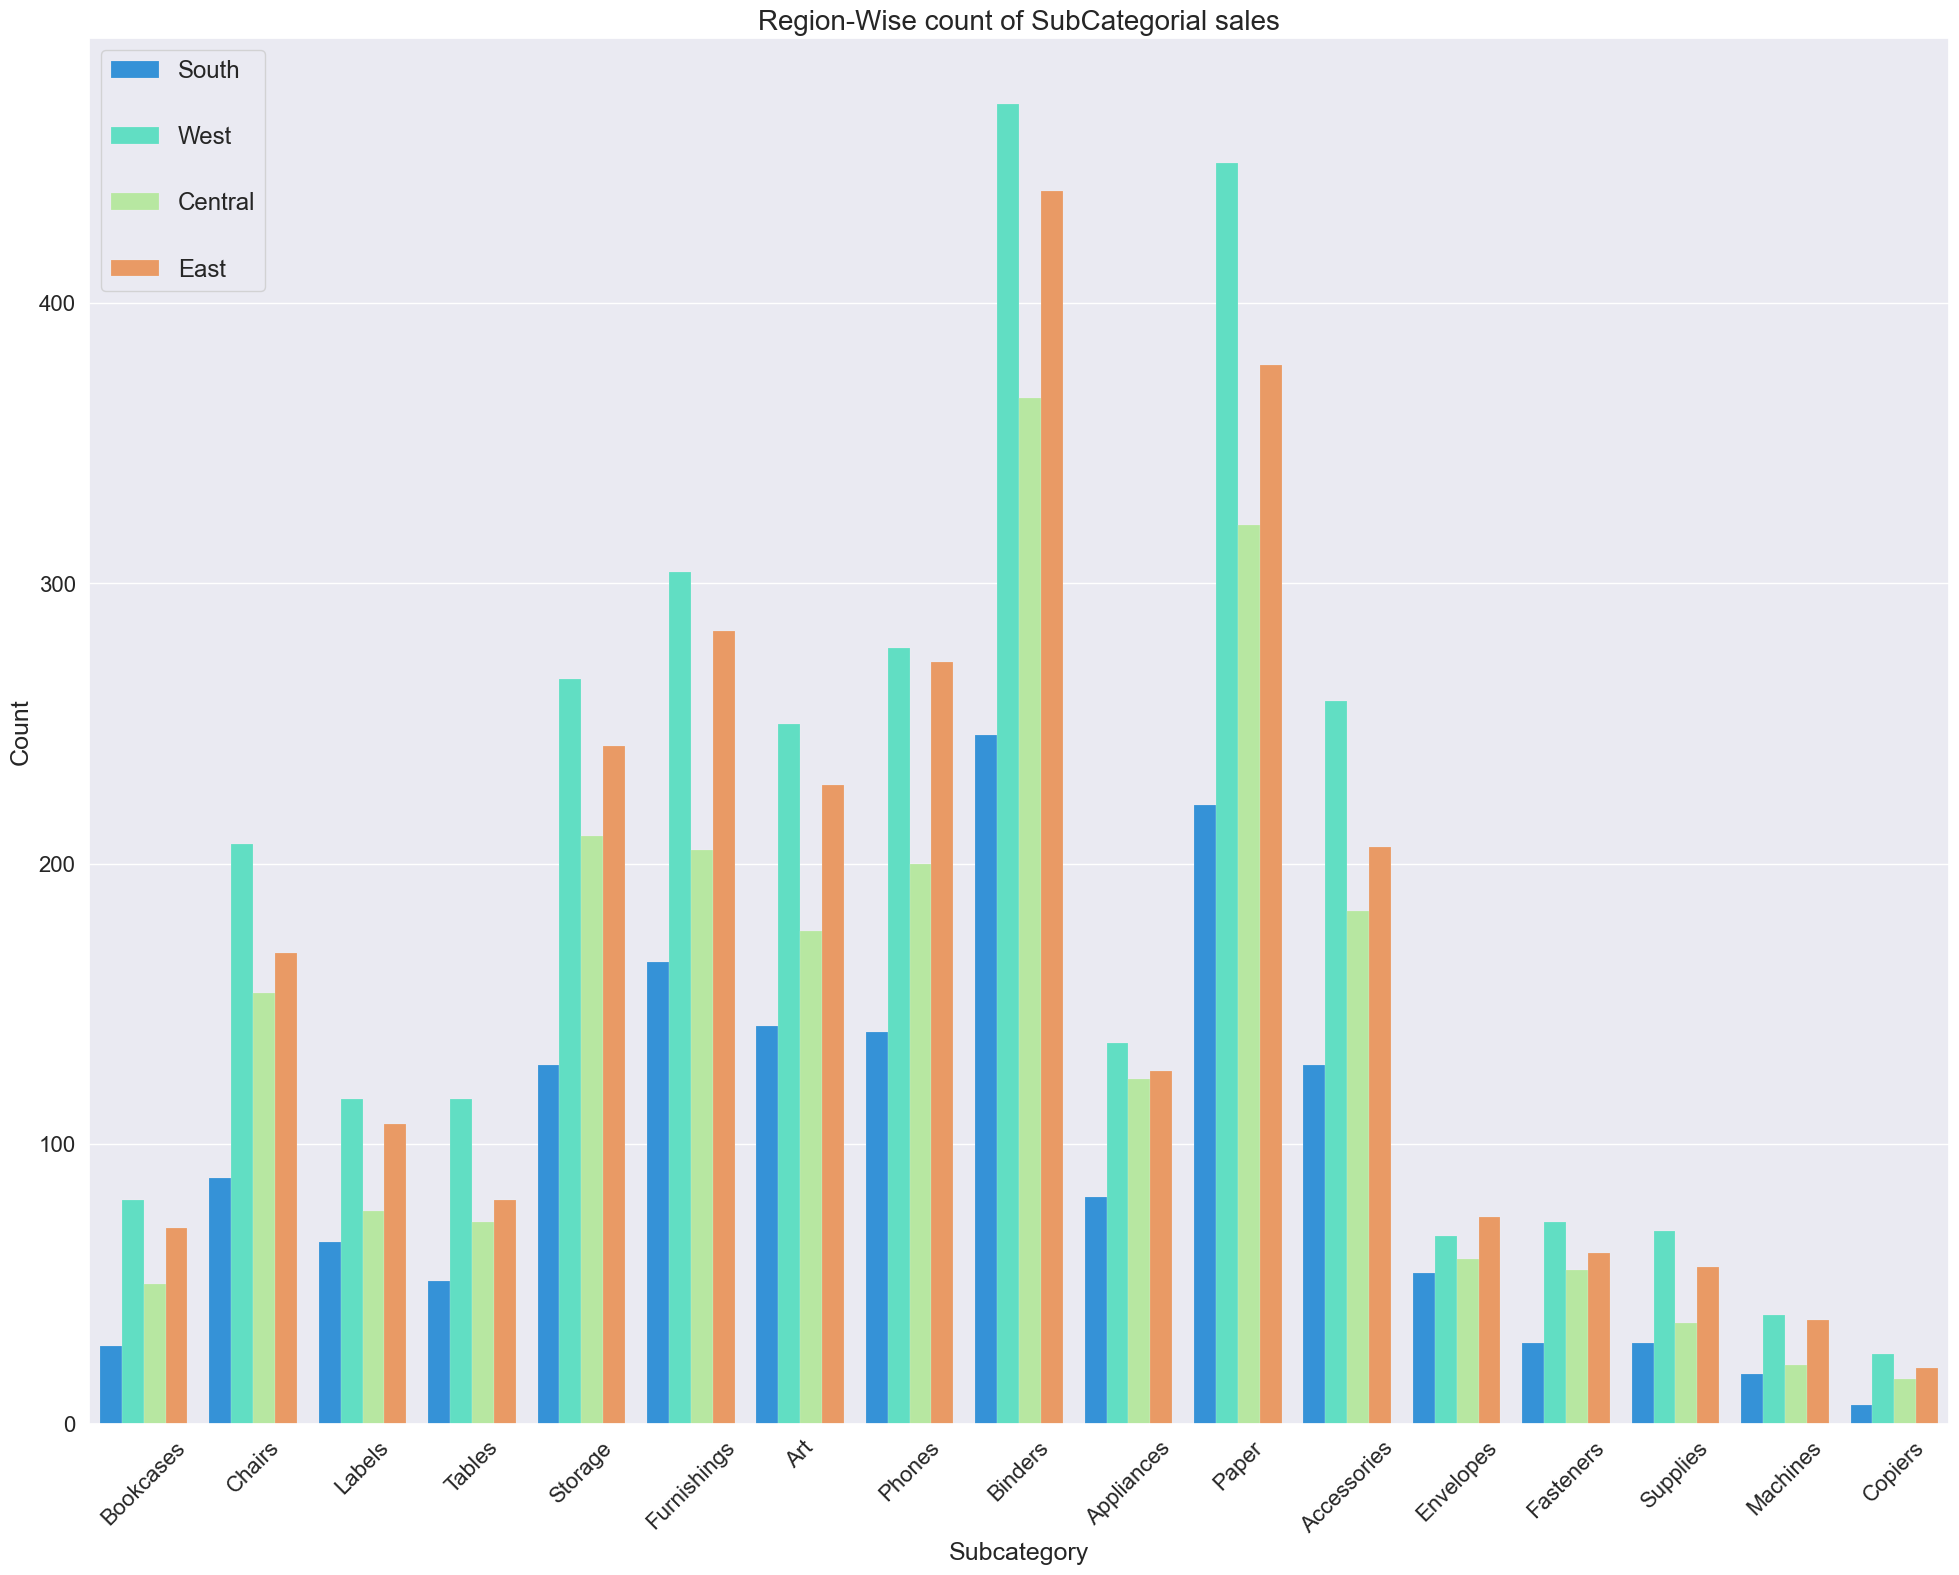

In [22]:
#region-wise count of categorical sales
sns.set(rc={'figure.figsize':(24,18)})
sns.countplot(x="Sub-Category",hue="Region",data=df,palette='rainbow',linewidth=0.1)
plt.xticks(rotation=45,fontsize=16)
plt.xlabel("Subcategory",fontsize=18)
plt.yticks(fontsize=16)
plt.ylabel("Count",fontsize=18)
plt.legend(loc=2,fontsize='x-large',labelspacing=1.8)
plt.title('Region-Wise count of SubCategorial sales',fontsize=20)

C:\Users\HP\opencv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


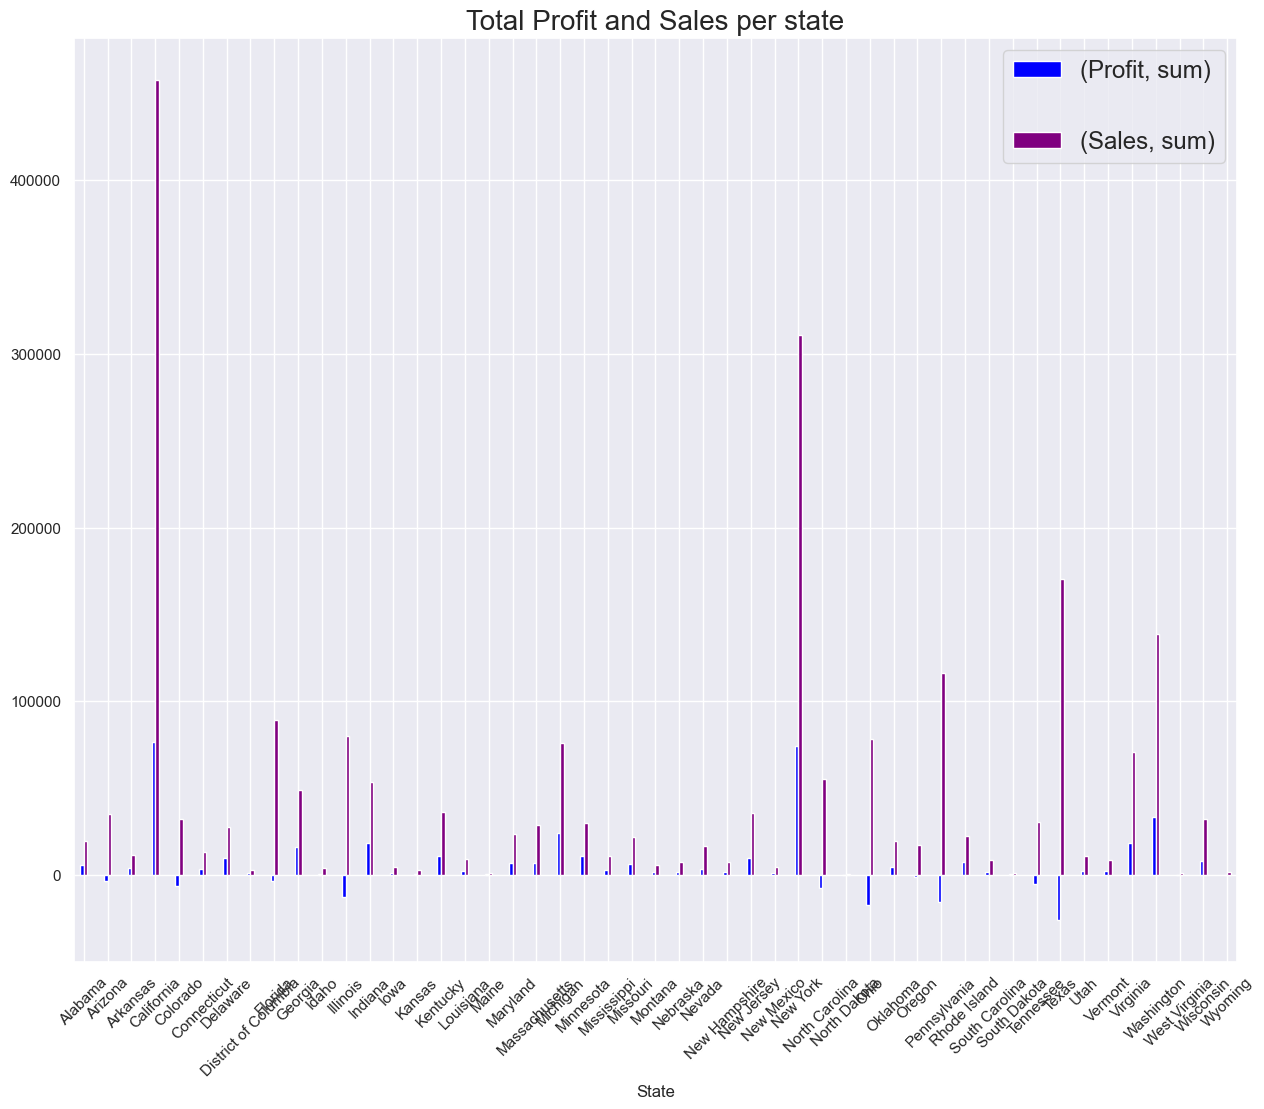

In [23]:
#profit and sales per sub-Category
df.groupby('State')['Profit','Sales'].agg(['sum']).plot.bar(rot=45,figsize=(15,12),color={'blue','purple'},width=0.3)
plt.legend(loc=1,fontsize='x-large',labelspacing=2.0)
plt.title('Total Profit and Sales per state',fontsize=20)
plt.show()


In [24]:
#Total cost and profit percentage  will help to understand the data better.
df['Cost']=df['Sales']-df['Profit']
df['Profit %']=(df['Profit']/df['Cost'])*100
df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,21.1452,19.402985
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,76.3268,20.481928
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,239.1828,8.108108
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,16.2800,81.818182


(7.5, -0.5)

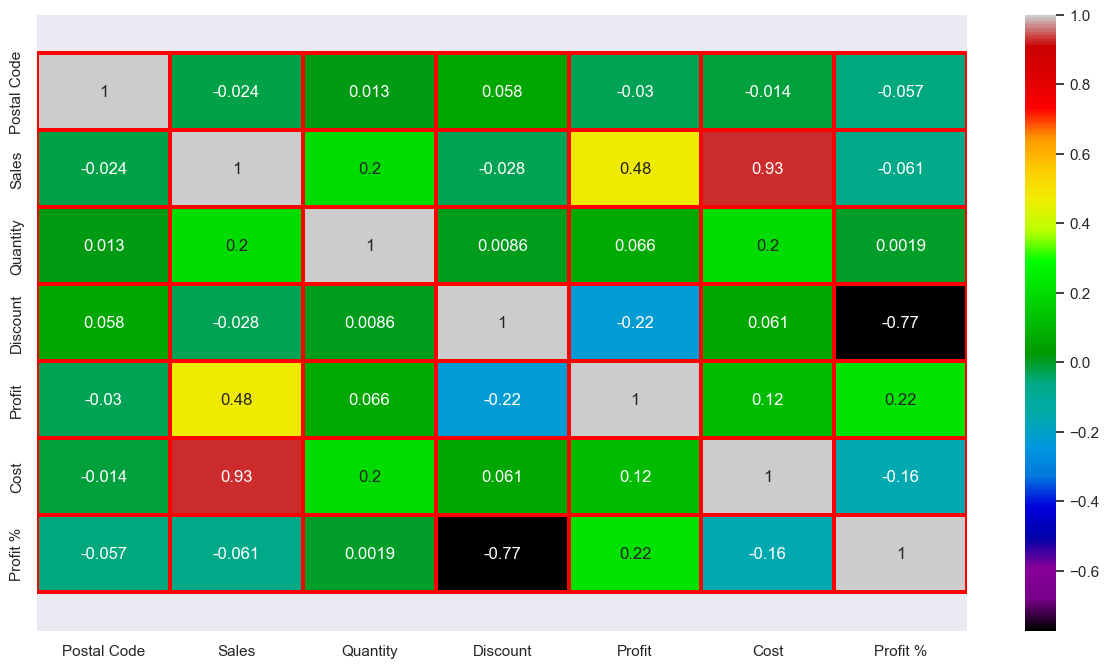

In [26]:
#Creating a correlation heatmap
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='nipy_spectral',annot=True,linecolor='red',linewidth=1.5)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)

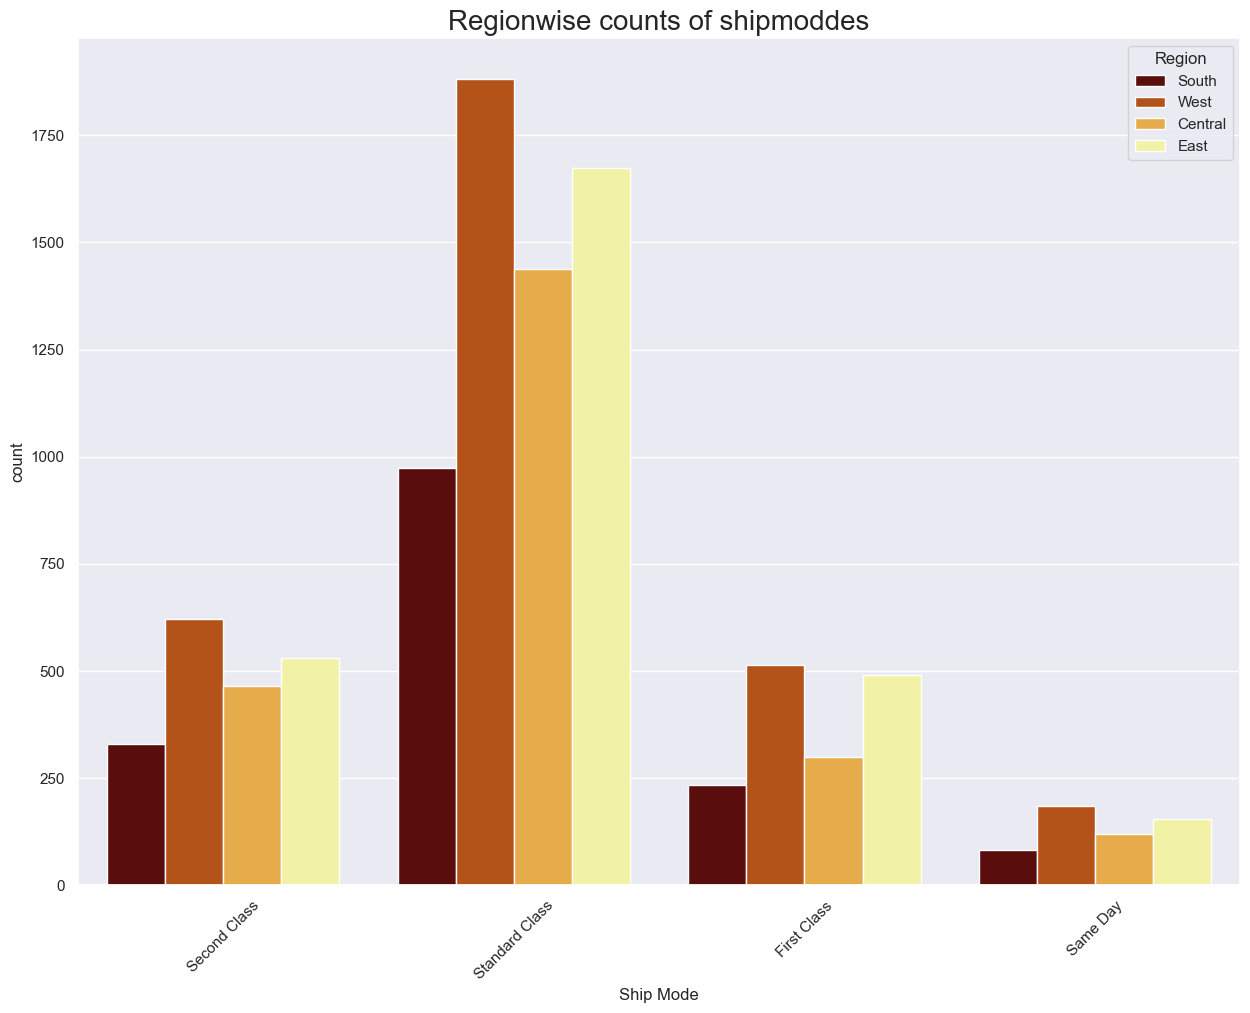

In [27]:
#plot count of ship modes region wise
plt.figure(figsize=(15,11))
sns.countplot(x="Ship Mode",hue="Region",data=df,palette='afmhot')
plt.xticks(rotation=45)
plt.title('Regionwise counts of shipmoddes',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Statewise Sales')

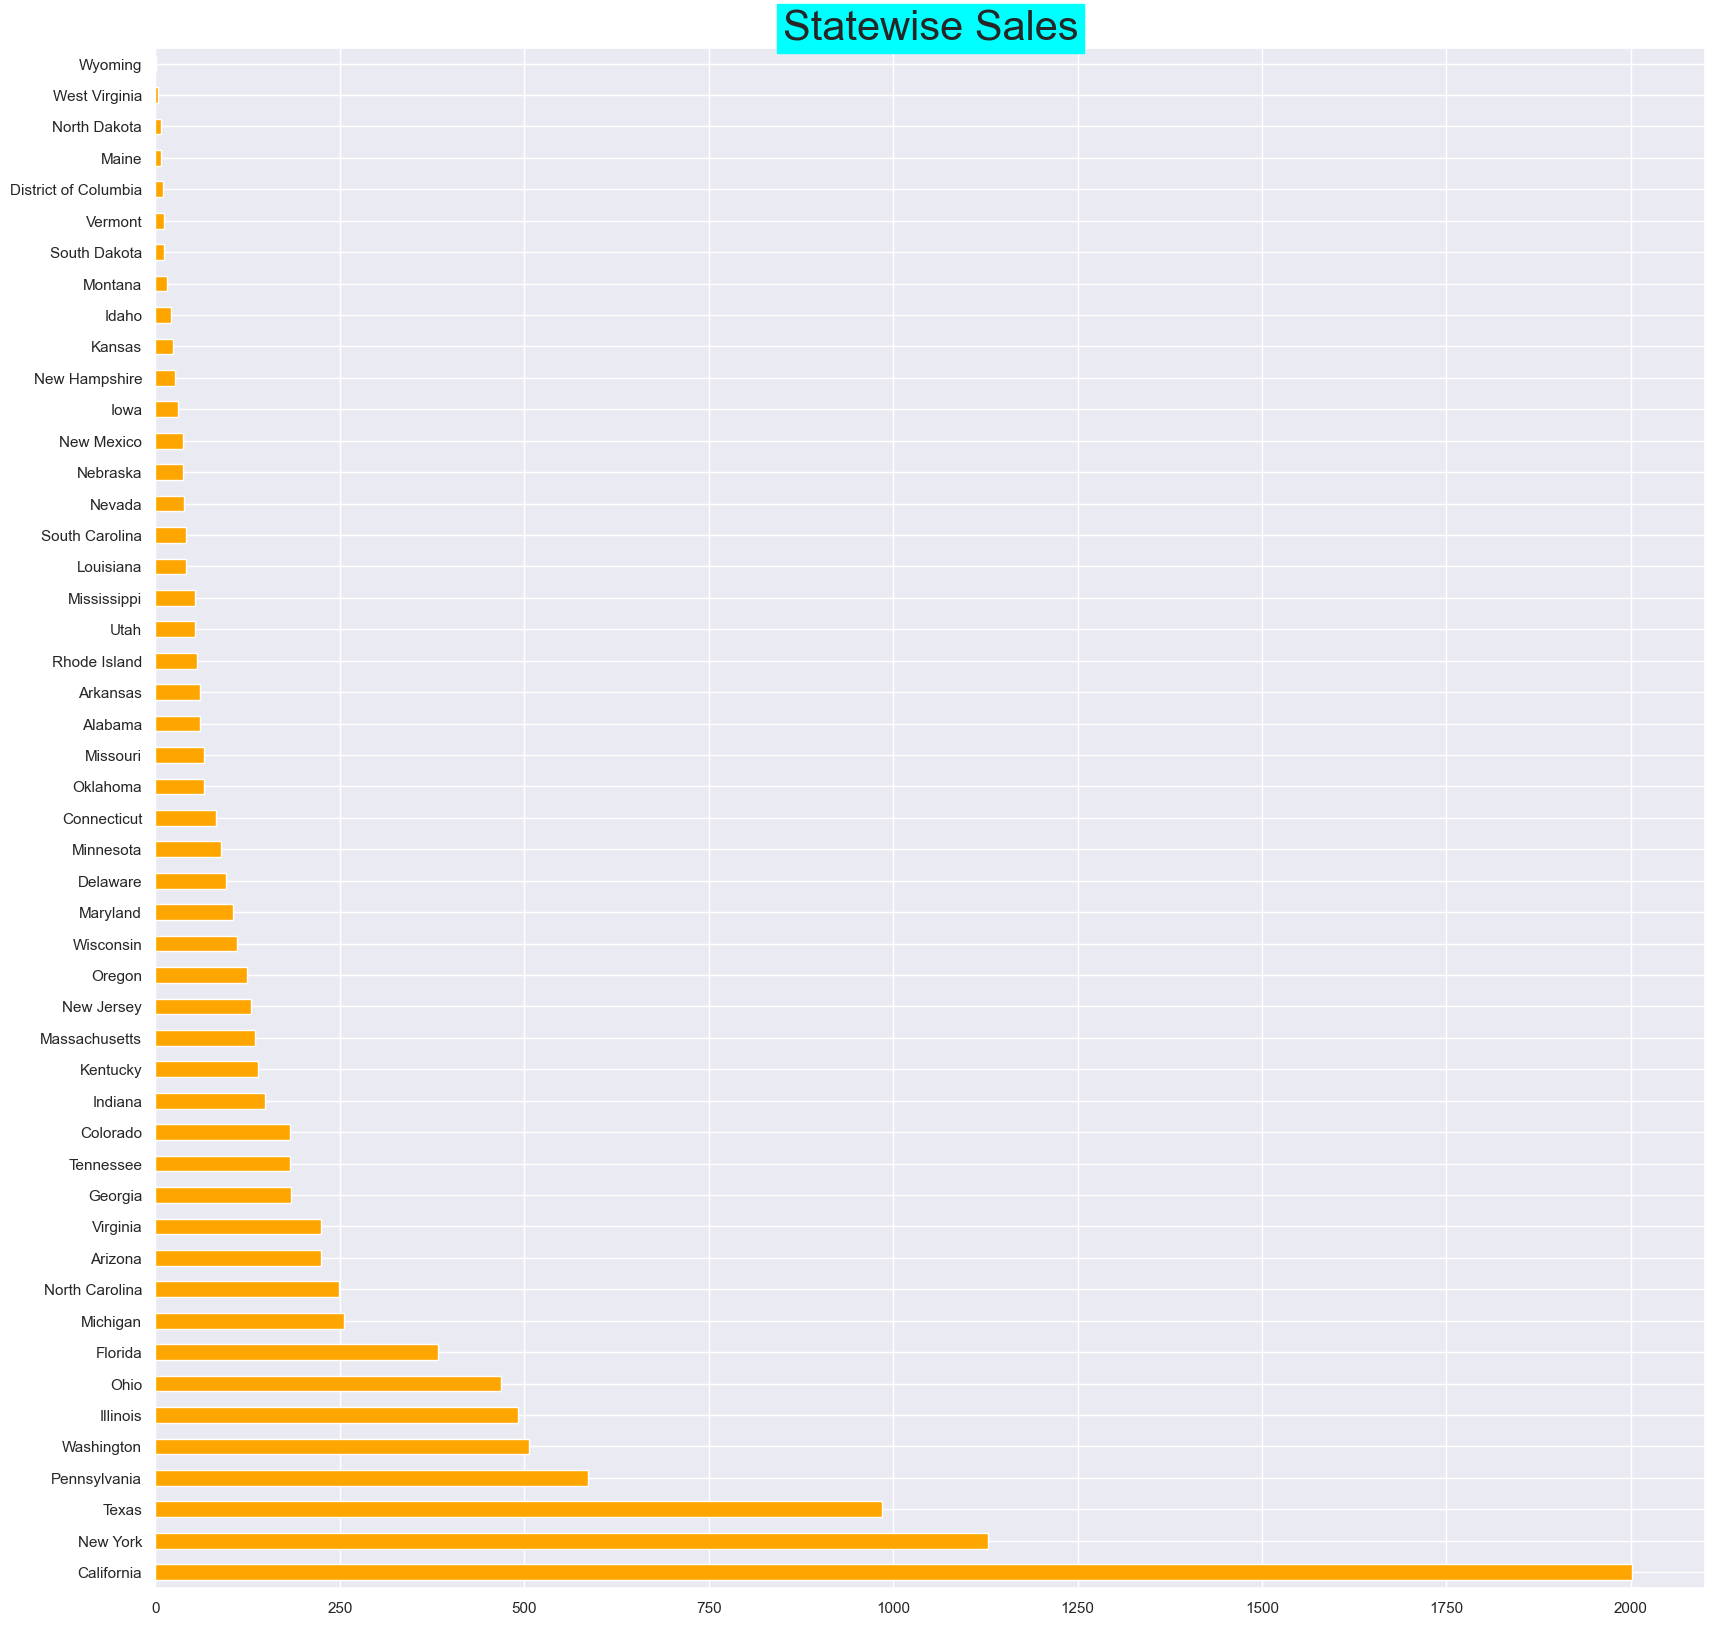

In [28]:
#state wise plot for sales
plt.figure(figsize=[20,20])
df['State'].value_counts().plot.barh(color='orange')
plt.title("Statewise Sales",fontsize=30,backgroundcolor='cyan')

In [29]:
#city wise performance
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64